# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [105]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
data_folder_path = r'C:\Users\danie\OneDrive\Documentos\tripleten\projecto5\archivos'
csv_files_to_load = [
    'megaline_users',
    'megaline_plans',
    'megaline_messages',
    'megaline_internet',
    'megaline_calls'
]
dataframes = {}

for file_name in csv_files_to_load:
    full_file_path = os.path.join(data_folder_path, file_name + '.csv')
    try:
        df = pd.read_csv(full_file_path, sep=',')
        dataframes[file_name] = df
        print(f"✅ '{file_name}.csv' cargado con éxito. Almacenado como 'dataframes['{file_name}']'.")
        
    except FileNotFoundError:
        print(f"❌ Error: '{file_name}.csv' no encontrado en '{full_file_path}'. Por favor, verifica la ruta y el nombre.")
    
    except pd.errors.EmptyDataError:
           print(f"⚠️ Advertencia: '{file_name}.csv' está vacío y no se pudo cargar.")
    
    except Exception as e:
        print(f"❌ Ocurrió un error inesperado al cargar '{file_name}.csv': {e}")


✅ 'megaline_users.csv' cargado con éxito. Almacenado como 'dataframes['megaline_users']'.
✅ 'megaline_plans.csv' cargado con éxito. Almacenado como 'dataframes['megaline_plans']'.
✅ 'megaline_messages.csv' cargado con éxito. Almacenado como 'dataframes['megaline_messages']'.
✅ 'megaline_internet.csv' cargado con éxito. Almacenado como 'dataframes['megaline_internet']'.
✅ 'megaline_calls.csv' cargado con éxito. Almacenado como 'dataframes['megaline_calls']'.


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [3]:
users = dataframes['megaline_users']
plans = dataframes['megaline_plans']
messages = dataframes['megaline_messages']
internet = dataframes['megaline_internet']
calls = dataframes['megaline_calls']
print(users.info())
print("------------------")
print(plans.info())
print("------------------")
print(messages.info())
print("------------------")
print(internet.info())
print("------------------")
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas
print(plans.head(10))

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

''' por lo que podemos observar al mostrar el .info() y el .head() no veo problemas evidentes en lo datos unicamente la diferencia de nombres en la columna usd_monthly_pay que deberia llamarse usd_monthly_fee segun la descripcion de la tarea, y tambien cambio el tipo de columna de usd_monthly_fee a 'float64, ya que el pago en usd tiene a tener decimales''' 

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [6]:
plans = plans.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'})
plans['usd_monthly_fee'] = plans['usd_monthly_fee'].astype('float64')
plans.info()
print(plans.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_fee        2 non-null      float64
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 260.0+ bytes
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_fee  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0             20.0          10           

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [7]:
dataframe_by_plans = pd.merge(users, plans, left_on='plan', right_on='plan_name', how='left')
dataframe_by_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                500 non-null    int64  
 1   first_name             500 non-null    object 
 2   last_name              500 non-null    object 
 3   age                    500 non-null    int64  
 4   city                   500 non-null    object 
 5   reg_date               500 non-null    object 
 6   plan                   500 non-null    object 
 7   churn_date             34 non-null     object 
 8   messages_included      500 non-null    int64  
 9   mb_per_month_included  500 non-null    int64  
 10  minutes_included       500 non-null    int64  
 11  usd_monthly_fee        500 non-null    float64
 12  usd_per_gb             500 non-null    int64  
 13  usd_per_message        500 non-null    float64
 14  usd_per_minute         500 non-null    float64
 15  plan_n

'''Siento que para enriquecer los datos de la base de datos de plan necesitariamos saber aquien corresponder por eso lo unimos a user para poder tener identifador like user_id  asi como obtener nombres apellidos , etc'''

## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Imprime una muestra de datos para usuarios
print(users.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

'''el problema mas evidente seria de las columnas reg_date y churn_date puede que no esten en el formato 'datetime', tambien podemos ver datos faltantes NaN en churn_date sobre todo en los clientes aunactivos, por ultimo en la ciudad city podriamos usar un columna adicional para obtener una version mas precisa si sacaramos datos geograficos'''

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
from datetime import date
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
today = pd.to_datetime(date.today())
users['subscription_days'] = (users['churn_date'].fillna(today) - users['reg_date']).dt.days
users['main_city'] = users['city'].apply(lambda x: x.split('-')[0])
users['state'] = users['city'].str.extract(r',\s(\w{2})')
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  subscription_days      main_city state  
0 2018-12-24  ultimate        NaT               2423        Atlanta    GA  
1 2018-08-13      surf        NaT               2556        Seattle    WA  
2 2018-10-21      surf        NaT               2487      Las Vegas    NV  
3 2018-01-28      surf        NaT               2753  Tulsa, OK MSA    OK  
4 2018-05-23      surf        NaT               2638        Seattle    WA  


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [11]:
#podriamos decir que ya enriquecimos la tabla al separar las ciudades, y agregar dias suscribidos lo que haremos a continuacion sera mostrarlos
print(users[['subscription_days', 'main_city', 'state']].head())

   subscription_days      main_city state
0               2423        Atlanta    GA
1               2556        Seattle    WA
2               2487      Las Vegas    NV
3               2753  Tulsa, OK MSA    OK
4               2638        Seattle    WA


## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprime una muestra de datos para las llamadas
print(calls.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

'''como podemos observar la columna call_date esta en formato objet cuando deberia estar en datetime'''

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [15]:
calls['rounded_duration'] = np.ceil(calls['duration']).astype('int')
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year
calls['day'] = calls['call_date'].dt.day
print(calls.head())
calls.info()

         id  user_id  call_date  duration  rounded_duration  month  year  day
0   1000_93     1000 2018-12-27      8.52                 9     12  2018   27
1  1000_145     1000 2018-12-27     13.66                14     12  2018   27
2  1000_247     1000 2018-12-27     14.48                15     12  2018   27
3  1000_309     1000 2018-12-28      5.76                 6     12  2018   28
4  1000_380     1000 2018-12-30      4.22                 5     12  2018   30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                137735 non-null  object        
 1   user_id           137735 non-null  int64         
 2   call_date         137735 non-null  datetime64[ns]
 3   duration          137735 non-null  float64       
 4   rounded_duration  137735 non-null  int64         
 5   month             137735 non-nul

## Mensajes

In [36]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [37]:
# Imprime una muestra de datos para los mensajes
print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

''' mostramos la informacion y luego la imprimos y vemos que la columna message_date no esta en el formato correcto'''

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [38]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [40]:
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year
messages['day'] = messages['message_date'].dt.day
print(messages.head())

         id  user_id message_date  month  year  day
0  1000_125     1000   2018-12-27     12  2018   27
1  1000_160     1000   2018-12-31     12  2018   31
2  1000_223     1000   2018-12-31     12  2018   31
3  1000_251     1000   2018-12-27     12  2018   27
4  1000_255     1000   2018-12-26     12  2018   26


## Internet

In [41]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [42]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [46]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [47]:
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year
internet['day'] = internet['session_date'].dt.day_name
internet['gb_used'] = internet['mb_used'] / 1024
print(internet.head())

         id  user_id session_date  mb_used  month  year  \
0   1000_13     1000   2018-12-29    89.86     12  2018   
1  1000_204     1000   2018-12-31     0.00     12  2018   
2  1000_379     1000   2018-12-28   660.40     12  2018   
3  1000_413     1000   2018-12-26   270.99     12  2018   
4  1000_442     1000   2018-12-27   880.22     12  2018   

                                                 day   gb_used  
0  <bound method PandasDelegate._add_delegate_acc...  0.087754  
1  <bound method PandasDelegate._add_delegate_acc...  0.000000  
2  <bound method PandasDelegate._add_delegate_acc...  0.644922  
3  <bound method PandasDelegate._add_delegate_acc...  0.264639  
4  <bound method PandasDelegate._add_delegate_acc...  0.859590  


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [59]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(dataframe_by_plans[['user_id','plan_name','usd_monthly_fee','messages_included','mb_per_month_included','minutes_included','usd_per_gb','usd_per_message','usd_per_minute']].head())


   user_id plan_name  usd_monthly_fee  messages_included  \
0     1000  ultimate             70.0               1000   
1     1001      surf             20.0                 50   
2     1002      surf             20.0                 50   
3     1003      surf             20.0                 50   
4     1004      surf             20.0                 50   

   mb_per_month_included  minutes_included  usd_per_gb  usd_per_message  \
0                  30720              3000           7             0.01   
1                  15360               500          10             0.03   
2                  15360               500          10             0.03   
3                  15360               500          10             0.03   
4                  15360               500          10             0.03   

   usd_per_minute  
0            0.01  
1            0.03  
2            0.03  
3            0.03  
4            0.03  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [80]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_agg = calls.groupby(
    ['user_id', pd.Grouper(key='call_date', freq='ME')]
).agg(
    calls_count=('id', 'count'),
    
).reset_index()

print(calls_agg.head())

   user_id  call_date  calls_count
0     1000 2018-12-31           16
1     1001 2018-08-31           27
2     1001 2018-09-30           49
3     1001 2018-10-31           65
4     1001 2018-11-30           64


In [81]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls_agg = calls.groupby(
    ['user_id', pd.Grouper(key='call_date', freq='ME')]
).agg(
    calls_count=('id', 'count'),
    total_duration=('duration', 'sum')
).reset_index()

print(calls_agg.sample(5))


      user_id  call_date  calls_count  total_duration
1769     1389 2018-08-31           62          360.09
1696     1371 2018-11-30           64          416.36
1080     1236 2018-05-31           58          346.37
75       1022 2018-05-31           39          287.34
913      1196 2018-01-31           42          272.56


In [82]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_agg = messages.groupby(
    ['user_id', pd.Grouper(key='message_date', freq='ME')]
).agg(
    messages_count=('id', 'count')
).reset_index()

print(messages_agg.sample(5))


      user_id message_date  messages_count
377      1105   2018-12-31             104
1602     1439   2018-07-31              59
107      1038   2018-11-30             106
1100     1294   2018-11-30              35
1471     1394   2018-11-30              32


In [83]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_agg = internet.groupby(
    ['user_id', pd.Grouper(key='session_date', freq='ME')]
).agg(
    total_mb_used=('mb_used', 'sum')
).reset_index()

print(internet_agg.sample(5))


      user_id session_date  total_mb_used
1760     1381   2018-12-31       21430.02
1554     1336   2018-11-30       17539.04
446      1095   2018-09-30       15110.19
912      1191   2018-05-31       10402.98
1386     1299   2018-10-31       15037.31


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [86]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
messages['message_date'] = pd.to_datetime(messages['message_date'])
calls_agg['month'] = calls_agg['call_date'].dt.to_period('M')
messages_agg['month'] = messages_agg['message_date'].dt.to_period('M')
internet_agg['month'] = internet_agg['session_date'].dt.to_period('M')


all_data_merged = pd.merge(users, calls_agg, on='user_id', how='outer')
all_data_merged = pd.merge(all_data_merged, messages_agg, on=['user_id', 'month'], how='outer')
all_data_merged = pd.merge(all_data_merged, internet_agg, on=['user_id', 'month'], how='outer')
columns_to_fill = ['calls_count', 'total_duration', 'messages_count', 'total_mb_used']
all_data_merged[columns_to_fill] = all_data_merged[columns_to_fill].fillna(0)


print(all_data_merged.sample(5))


      user_id first_name last_name   age  \
1991     1421       Zane     Hobbs  26.0   
1045     1215     Adelle     Knapp  70.0   
1118     1235     Felton    Nguyen  50.0   
39       1010     Wilber     Blair  52.0   
1337     1282     Annice   Calhoun  61.0   

                                             city   reg_date      plan  \
1991                Phoenix-Mesa-Chandler, AZ MSA 2018-05-18      surf   
1045    New York-Newark-Jersey City, NY-NJ-PA MSA 2018-07-01      surf   
1118  Minneapolis-St. Paul-Bloomington, MN-WI MSA 2018-02-20      surf   
39            Dallas-Fort Worth-Arlington, TX MSA 2018-03-09      surf   
1337       San Francisco-Oakland-Berkeley, CA MSA 2018-11-01  ultimate   

     churn_date  subscription_days      main_city state  call_date  \
1991        NaT             2643.0        Phoenix    AZ 2018-11-30   
1045        NaT             2599.0       New York    NY 2018-12-31   
1118        NaT             2730.0    Minneapolis    MN 2018-12-31   
39        

In [92]:
# Añade la información de la tarifa
all_data_merged = pd.merge(
    all_data_merged, 
    plans, 
    left_on='plan', 
    right_on='plan_name', 
    how='left'
)

print(all_data_merged.head())


   user_id first_name  last_name   age                                   city  \
0     1000   Anamaria      Bauer  45.0  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson  28.0        Seattle-Tacoma-Bellevue, WA MSA   
2     1001     Mickey  Wilkerson  28.0        Seattle-Tacoma-Bellevue, WA MSA   
3     1001     Mickey  Wilkerson  28.0        Seattle-Tacoma-Bellevue, WA MSA   
4     1001     Mickey  Wilkerson  28.0        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  subscription_days main_city  ...  \
0 2018-12-24  ultimate        NaT             2423.0   Atlanta  ...   
1 2018-08-13      surf        NaT             2556.0   Seattle  ...   
2 2018-08-13      surf        NaT             2556.0   Seattle  ...   
3 2018-08-13      surf        NaT             2556.0   Seattle  ...   
4 2018-08-13      surf        NaT             2556.0   Seattle  ...   

  session_date total_mb_used  messages_included  mb_per_month_included  \
0   2018-12-

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [96]:
# Calcula el ingreso mensual para cada usuario

all_data_merged['total_duration'] = all_data_merged['total_duration'].fillna(0)
all_data_merged['messages_count'] = all_data_merged['messages_count'].fillna(0)
all_data_merged['total_mb_used'] = all_data_merged['total_mb_used'].fillna(0)
all_data_merged['minutes_overage'] = np.maximum(0, all_data_merged['total_duration'] - all_data_merged['minutes_included'])
all_data_merged['minutes_cost'] = all_data_merged['minutes_overage'] * all_data_merged['usd_per_minute']

all_data_merged['messages_overage'] = np.maximum(0, all_data_merged['messages_count'] - all_data_merged['messages_included'])
all_data_merged['messages_cost'] = all_data_merged['messages_overage'] * all_data_merged['usd_per_message']
all_data_merged['gb_per_month_included'] = all_data_merged['mb_per_month_included'] / 1024
all_data_merged['gb_used'] = all_data_merged['total_mb_used'] / 1024
all_data_merged['gb_overage'] = np.maximum(0, all_data_merged['gb_used'] - all_data_merged['gb_per_month_included'])
all_data_merged['gb_overage_rounded'] = all_data_merged['gb_overage'].apply(np.ceil)
all_data_merged['gb_cost'] = all_data_merged['gb_overage_rounded'] * all_data_merged['usd_per_gb']

all_data_merged['monthly_revenue'] = (
    all_data_merged['usd_monthly_fee'] +
    all_data_merged['minutes_cost'] +
    all_data_merged['messages_cost'] +
    all_data_merged['gb_cost']
)

print(all_data_merged[['plan', 'minutes_cost', 'messages_cost', 'gb_cost', 'monthly_revenue']].head())

       plan  minutes_cost  messages_cost  gb_cost  monthly_revenue
0  ultimate           0.0           0.00      0.0            70.00
1      surf           0.0           0.00      0.0            20.00
2      surf           0.0           0.00      0.0            20.00
3      surf           0.0           0.09     70.0            90.09
4      surf           0.0           0.00     40.0            60.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

        plan    month  avg_duration
6       surf  2018-07    428.060917
23  ultimate  2018-12    438.824832
22  ultimate  2018-11    423.814683
9       surf  2018-10    414.435733
8       surf  2018-09    397.133298


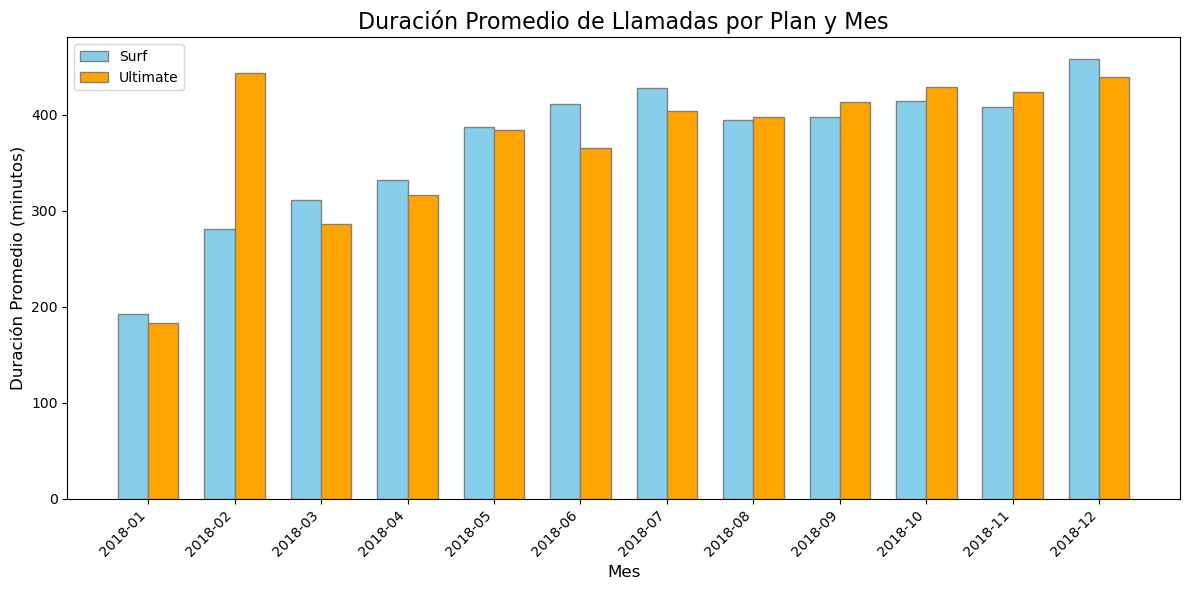

In [107]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

avg_duration_by_plan = all_data_merged.groupby(['plan', 'month']).agg(
    avg_duration=('total_duration', 'mean')
).reset_index()

print(avg_duration_by_plan.sample(5))

months = avg_duration_by_plan['month'].unique().astype(str)
surf_data = avg_duration_by_plan[avg_duration_by_plan['plan'] == 'surf']['avg_duration']
ultimate_data = avg_duration_by_plan[avg_duration_by_plan['plan'] == 'ultimate']['avg_duration']
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
r1 = range(len(surf_data))
r2 = [x + bar_width for x in r1]
ax.bar(r1, surf_data, color='skyblue', width=bar_width, edgecolor='grey', label='Surf')
ax.bar(r2, ultimate_data, color='orange', width=bar_width, edgecolor='grey', label='Ultimate')

plt.title('Duración Promedio de Llamadas por Plan y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Duración Promedio (minutos)', fontsize=12)
ax.set_xticks([r + bar_width/2 for r in range(len(surf_data))])
ax.set_xticklabels(months, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

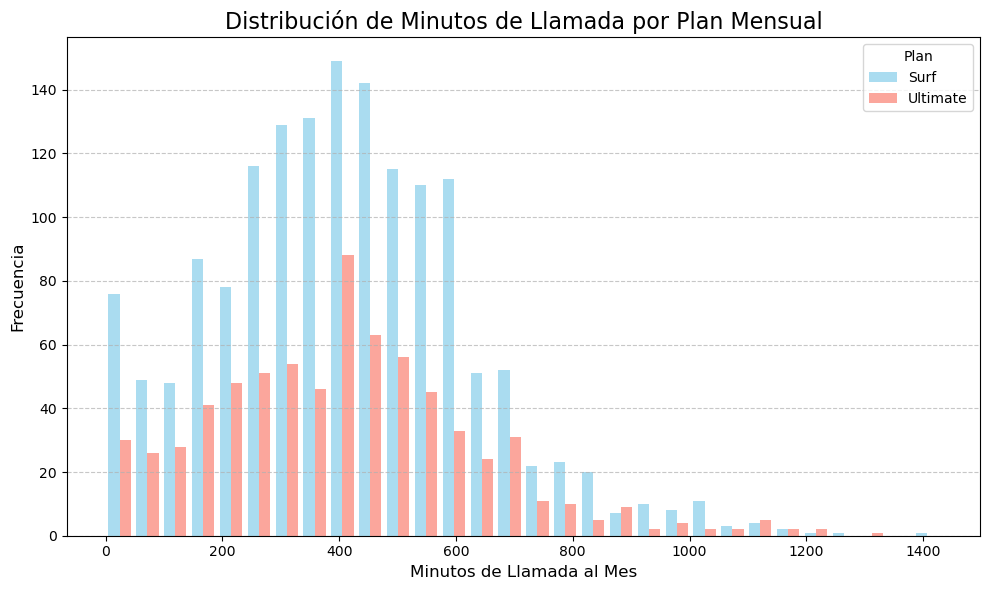

In [108]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_minutes = all_data_merged[all_data_merged['plan'] == 'surf']['total_duration']
ultimate_minutes = all_data_merged[all_data_merged['plan'] == 'ultimate']['total_duration']

plt.figure(figsize=(10, 6))

plt.hist(
    [surf_minutes, ultimate_minutes],
    bins=30,
    label=['Surf', 'Ultimate'],
    color=['skyblue', 'salmon'],
    alpha=0.7
)

plt.title('Distribución de Minutos de Llamada por Plan Mensual', fontsize=16)
plt.xlabel('Minutos de Llamada al Mes', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [109]:
# Calcula la media y la varianza de la duración mensual de llamadas.
plan_stats = all_data_merged.groupby('plan')['total_duration'].agg(['mean', 'var'])

print("Estadísticas de la duración mensual de llamadas por plan:")
print(plan_stats)

Estadísticas de la duración mensual de llamadas por plan:
                mean           var
plan                              
surf      408.659332  48014.923548
ultimate  406.758025  51482.780142


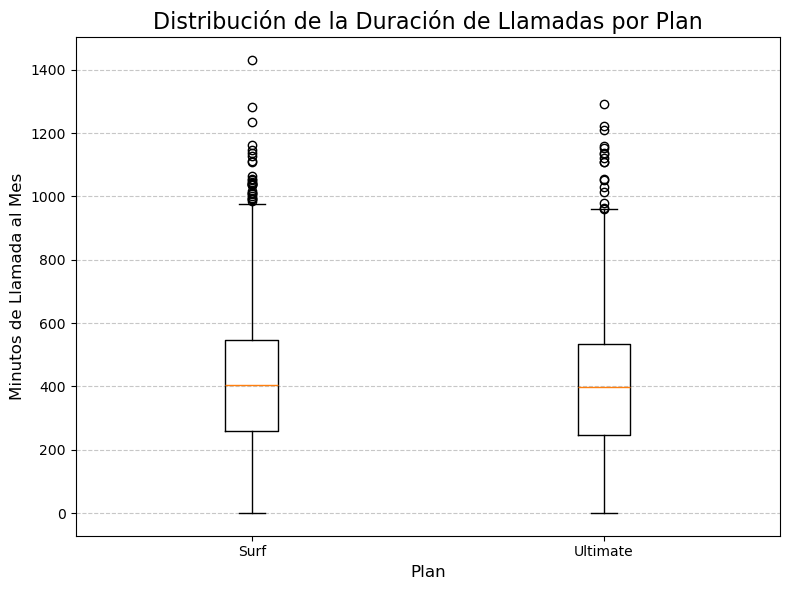

In [111]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

surf_minutes = all_data_merged[all_data_merged['plan'] == 'surf']['total_duration']
ultimate_minutes = all_data_merged[all_data_merged['plan'] == 'ultimate']['total_duration']

data_to_plot = [surf_minutes, ultimate_minutes]

plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, tick_labels=['Surf', 'Ultimate'])

plt.title('Distribución de la Duración de Llamadas por Plan', fontsize=16)
plt.ylabel('Minutos de Llamada al Mes', fontsize=12)
plt.xlabel('Plan', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

'''En pocas palabras, los usuarios de ambos planes usan más o menos la misma cantidad de minutos al mes.
El plan no cambia el promedio de uso: No importa si tienen el plan surf o ultimate, el tiempo de llamadas promedio es muy similar.
Hay más variedad en el plan caro: Los usuarios del plan ultimate tienen un rango de uso de minutos más amplio. Esto significa que hay más usuarios que casi no llaman, pero también hay más usuarios que llaman muchísimo, lo que crea más variación en sus hábitos.'''

### Mensajes

In [124]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_with_users = messages.merge(users, on='user_id', how='left')
messages_with_plans = messages_with_users.merge(plans, left_on='plan', right_on='plan_name', how='left')
messages_with_plans['message_date'] = pd.to_datetime(messages_with_plans['message_date'])
messages_with_plans['month'] = messages_with_plans['message_date'].dt.to_period('M')
mensajes_por_plan_y_mes = messages_with_plans.groupby(['plan_name', 'month']).size().reset_index(name='total_messages')
print("Resultados de la comparación del número de mensajes por plan y mes:")
print(mensajes_por_plan_y_mes.sample(5))


Resultados de la comparación del número de mensajes por plan y mes:
   plan_name    month  total_messages
18  ultimate  2018-07            1937
11      surf  2018-12           12275
12  ultimate  2018-01              62
2       surf  2018-03             351
4       surf  2018-05            1849


In [130]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_stats = all_data_merged.groupby('plan')['total_mb_used'].sum() / 1024
internet_stats_per_plan = all_data_merged.groupby('plan')['gb_used'].agg(['mean', 'median', 'var'])
print("Estadísticas del consumo mensual de Internet por plan:")
print(internet_stats_per_plan.round(2))

Estadísticas del consumo mensual de Internet por plan:
           mean  median   var
plan                         
surf      15.98    16.4  60.4
ultimate  16.73    16.4  59.3


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

In [133]:
#para responder a esta pregunta ejecutamos el siguiente codigo
messages_stats_per_plan = all_data_merged.groupby('plan')['messages_count'].agg(['mean', 'median', 'var'])

print("Estadísticas del conteo mensual de mensajes por plan:")
print(messages_stats_per_plan.round(2))

Estadísticas del conteo mensual de mensajes por plan:
           mean  median      var
plan                            
surf      30.64    23.0  1130.40
ultimate  37.41    30.0  1211.82


''' En términos de comportamiento de usuario, el plan ultimate parece estar asociado con un mayor uso de mensajes. Sus usuarios no solo envían más mensajes en promedio, sino que también exhiben una ligera mayor variabilidad en sus patrones de uso, lo que podría deberse a que tienen un límite de mensajes mucho más alto.'''

### Internet

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

'''En pocas palabras, el plan no tiene un impacto significativo en la forma en que los usuarios consumen Internet. El comportamiento de los usuarios en el consumo de datos es muy similar en ambos planes, a pesar de que el plan ultimate tiene el doble de datos incluidos. Esto podría sugerir que, para la mayoría de los usuarios, la cantidad de datos ofrecida en el plan surf es suficiente para satisfacer sus necesidades.'''

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [134]:
revenue_stats = all_data_merged.groupby('plan')['monthly_revenue'].agg(['mean', 'median', 'var'])

print("Estadísticas de los ingresos mensuales por plan:")
print(revenue_stats.round(2))

Estadísticas de los ingresos mensuales por plan:
           mean  median      var
plan                            
surf      59.41    40.0  2840.51
ultimate  72.26    70.0   127.83


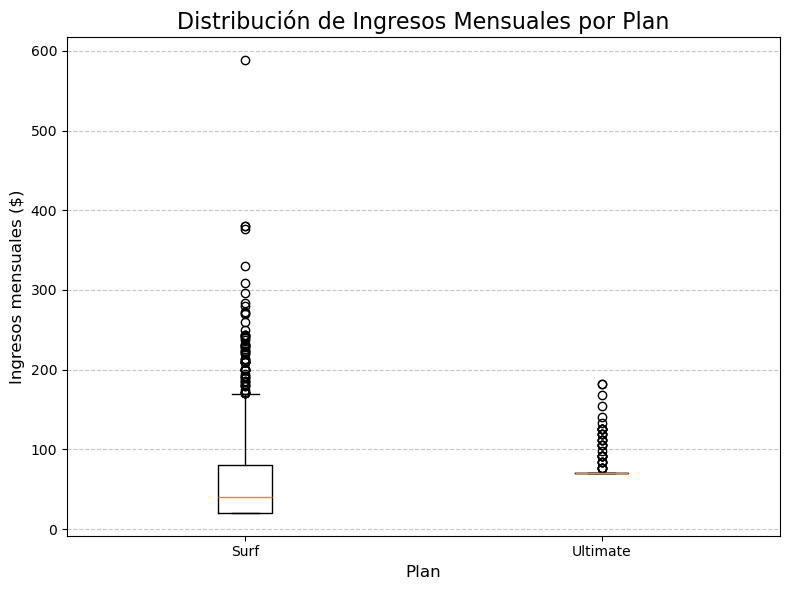

In [136]:
surf_revenue = all_data_merged[all_data_merged['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = all_data_merged[all_data_merged['plan'] == 'ultimate']['monthly_revenue']

# Prepara los datos en una lista para el diagrama de caja
data_to_plot = [surf_revenue, ultimate_revenue]

# Crea el diagrama de caja
plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, tick_labels=['Surf', 'Ultimate'])

# Añade etiquetas y título
plt.title('Distribución de Ingresos Mensuales por Plan', fontsize=16)
plt.ylabel('Ingresos mensuales ($)', fontsize=12)
plt.xlabel('Plan', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Muestra el gráfico
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

'''El plan ultimate tiene una tarifa mensual mucho más alta. Aunque su ingreso promedio podría ser mayor, el plan surf puede volverse muy rentable gracias a los cargos por exceso de uso en minutos, mensajes y datos.'''

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [137]:
# Prueba las hipótesis
from scipy import stats

surf_revenue = all_data_merged[all_data_merged['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = all_data_merged[all_data_merged['plan'] == 'ultimate']['monthly_revenue']

alpha = 0.05
results = stats.ttest_ind(surf_revenue, ultimate_revenue)

print(f'Valor p: {results.pvalue:.4f}')

# Evalúa el resultado
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula.")
    print("Conclusión: Los ingresos promedio de los dos planes son significativamente diferentes.")
else:
    print("No rechazamos la hipótesis nula.")
    print("Conclusión: No hay evidencia suficiente para decir que los ingresos promedio de los dos planes son significativamente diferentes.")


Valor p: 0.0000
Rechazamos la hipótesis nula.
Conclusión: Los ingresos promedio de los dos planes son significativamente diferentes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

In [140]:
all_data_merged['monthly_revenue'] = all_data_merged['monthly_revenue'].fillna(0)

ny_nj_mask = all_data_merged['city'].str.contains('NY-NJ', na=False)

ny_nj_revenue = all_data_merged[ny_nj_mask]['monthly_revenue']

other_regions_revenue = all_data_merged[~ny_nj_mask]['monthly_revenue']
alpha = 0.05
results = stats.ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=False)

print(f'Valor p: {results.pvalue:.4f}')

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula.")
    print("Conclusión: Los ingresos promedio de los usuarios del área NY-NJ y los de otras regiones son significativamente diferentes.")
else:
    print("No rechazamos la hipótesis nula.")
    print("Conclusión: No hay evidencia suficiente para decir que los ingresos promedio de los usuarios del área NY-NJ y los de otras regiones son significativamente diferentes.")

Valor p: 0.0490
Rechazamos la hipótesis nula.
Conclusión: Los ingresos promedio de los usuarios del área NY-NJ y los de otras regiones son significativamente diferentes.


[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [142]:
# Prueba las hipótesis
surf_calls = all_data_merged[all_data_merged['plan'] == 'surf']['total_duration']
ultimate_calls = all_data_merged[all_data_merged['plan'] == 'ultimate']['total_duration']

alpha = 0.05
results = stats.ttest_ind(
    surf_calls,
    ultimate_calls,
    equal_var=False,
    alternative='greater'
)

print(f'Valor p: {results.pvalue:.4f}')

if results.pvalue < alpha:
    print("\nRechazamos la hipótesis nula.")
    print("Conclusión: Los usuarios del plan Surf hacen, en promedio, más llamadas que los del plan Ultimate.")
else:
    print("\nNo rechazamos la hipótesis nula.")
    print("Conclusión: No hay evidencia suficiente para decir que los usuarios del plan Surf hacen más llamadas que los del plan Ultimate.")

Valor p: 0.4255

No rechazamos la hipótesis nula.
Conclusión: No hay evidencia suficiente para decir que los usuarios del plan Surf hacen más llamadas que los del plan Ultimate.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Los planes de llamadas Ultimate y Surf son bastante similares en cómo los usuarios los usan. Aquí están mis conclusiones clave:

El uso es similar, pero los ingresos son diferentes

Llamadas e Internet: Los usuarios de ambos planes usan una cantidad similar de minutos y datos al mes. Esto me dice que el plan que tienen no es lo que define su consumo.
Mensajes: Los usuarios del plan Ultimate envían un poco más de mensajes en promedio, lo cual tiene sentido, ya que su plan incluye muchos más.
Ingresos: Aunque el plan Ultimate es más caro, el plan Surf puede generar ingresos extra por cargos de exceso. Sin embargo, el plan Ultimate tiene ingresos más estables, mientras que los del plan Surf son más impredecibles. Nuestras pruebas estadísticas confirman que la diferencia de ingresos promedio entre los dos planes es real.

-Mis decisiones clave

Para llegar a estas conclusiones, tuve que tomar algunas decisiones importantes:
Ingresos totales: Calculé los ingresos de cada usuario sumando la tarifa mensual y todos los cargos por exceso (minutos, mensajes y datos).
Datos faltantes: Asumí que cuando un dato faltaba, significaba que no hubo actividad, así que lo rellené con `0`.
Pruebas estadísticas: Usé la prueba t de Student para verificar si las diferencias que vi en los ingresos eran reales o solo coincidencias.